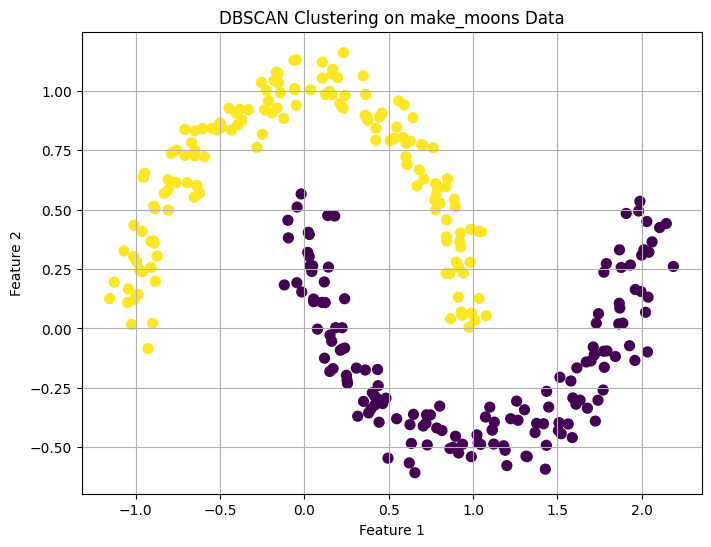

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped data
X, y = make_moons(n_samples=300, noise=0.07, random_state=42)

# DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering on make_moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

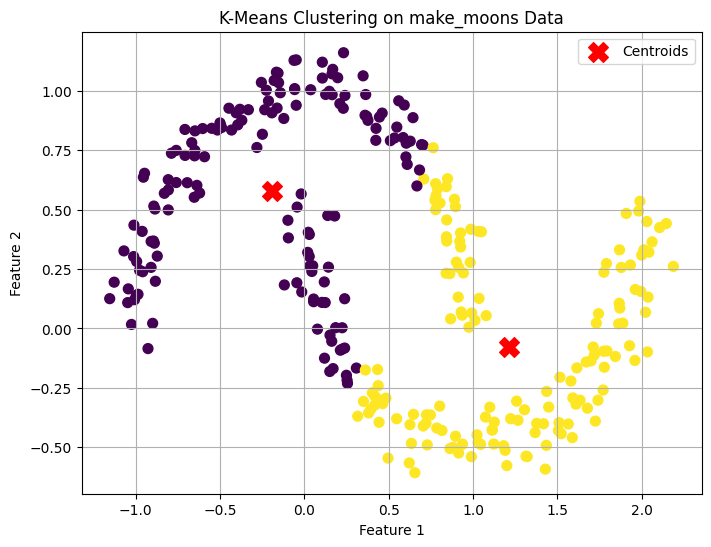

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Generate moon-shaped data
X, y = make_moons(n_samples=300, noise=0.07, random_state=42)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering on make_moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

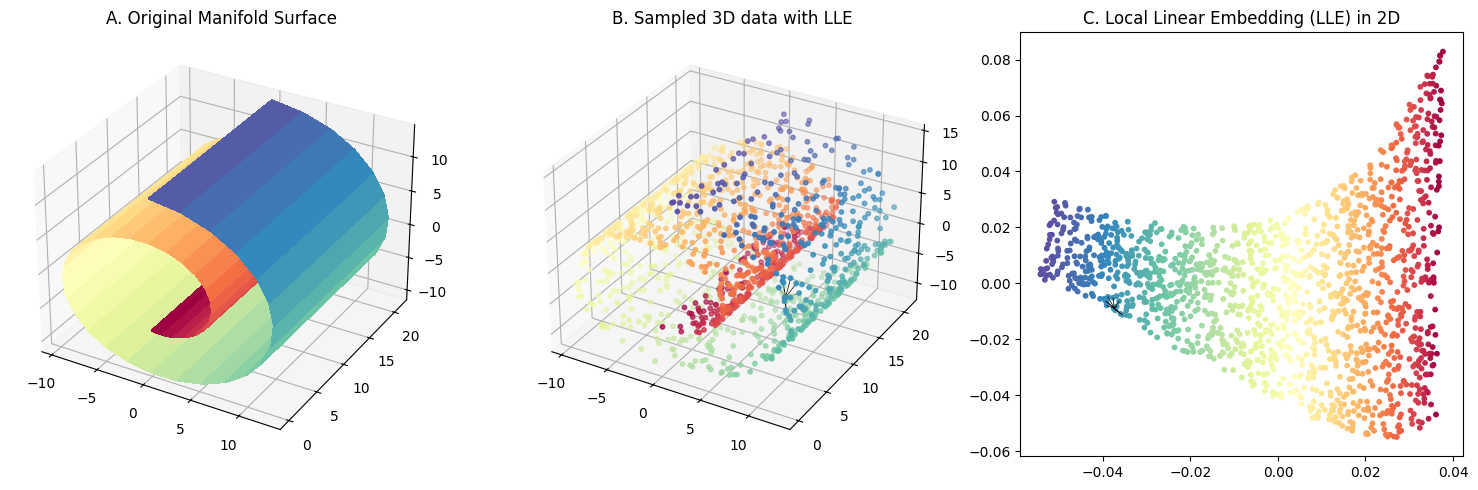

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.neighbors import NearestNeighbors

# Create the Swiss roll dataset
n_samples = 1500
noise = 0.0
X, t = make_swiss_roll(n_samples=n_samples, noise=noise)

# Apply LLE
n_neighbors = 12
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2)
X_lle = lle.fit_transform(X)

# Neighborhood (same for B and C)
point_idx = 100
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
_, indices = nbrs.kneighbors([X[point_idx]])

fig = plt.figure(figsize=(15, 5))

# A: Original manifold
ax = fig.add_subplot(131, projection='3d')
t_grid = np.linspace(1.5 * np.pi, 4.5 * np.pi, 40)
h_grid = np.linspace(0, 21, 20)
T, H = np.meshgrid(t_grid, h_grid)
X_grid = T * np.cos(T)
Y_grid = H
Z_grid = T * np.sin(T)
color_grid = T

surf = ax.plot_surface(X_grid, Y_grid, Z_grid, facecolors=plt.cm.Spectral((color_grid - color_grid.min()) / (color_grid.max() - color_grid.min())),
                       rstride=1, cstride=1, antialiased=False, shade=False)
ax.set_title("A. Original Manifold Surface")

# B:
ax = fig.add_subplot(132, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.Spectral, s=10)
# drawing black lines from a single reference point (the “neighborhood center”) to each of its neighbors.
for i in indices[0]:
    ax.plot([X[point_idx, 0], X[i, 0]],
            [X[point_idx, 1], X[i, 1]],
            [X[point_idx, 2], X[i, 2]], color='k', linewidth=0.5)
ax.set_title("B. Sampled 3D data with LLE")

# C:
ax = fig.add_subplot(133)
ax.scatter(X_lle[:, 0], X_lle[:, 1], c=t, cmap=plt.cm.Spectral, s=10)
# drawing black lines from a single reference point (the “neighborhood center”) to each of its neighbors.
for i in indices[0]:
    ax.plot([X_lle[point_idx, 0], X_lle[i, 0]],
            [X_lle[point_idx, 1], X_lle[i, 1]], color='k', linewidth=0.5)
ax.set_title("C. Local Linear Embedding (LLE) in 2D")

plt.tight_layout()
plt.show()